In [1]:
#Importando as libs necessárias
import pandas as pd
import matplotlib.pyplot as plot
%matplotlib inline
import requests
path = "../data/"

## Dados Abertos Câmara dos Deputados

Para este projeto iremos acessar a base de dados disponibilizada pelo Governo Federal afim de analisar os dados referentes aos gastos públicos dos nossos deputados e senadores. Esta política de dados abertos foi iniciada em 2016 no governo de Dilma Roussef, com o Decreto 8.777, que instaurou a [Política de Dados Abertos do Poder Executivo federal](http://www.planalto.gov.br/ccivil_03/_ato2015-2018/2016/decreto/D8777.htm). 


Sendo assim, iremos verificar, analisar, comparar, criar algumas perguntas/observações sobre os dados e reponde-las com os mesmos.

Esses dados estão disponibilizados nos portais de Dados Abertos do **Senado Federal** e da **Câmara dos Deputados**. 
 

### Escopo do trabalho

- Neste trabalho iremos usar alguns parâmetros para focar nossos esforços em dados mais proximos da nossa realidade, portanto iremos trabalhar apenas com  a analise dos parlamentares do estado do Nordeste.  
  
  
- Dessa forma, algumas pesquisas foram feitas anteriormente e durante o projeto, afim de tornar as comparações e analisés mais coerentes e consistentes para conseguirmos visualizar melhor e encontrar informações a partir dos gastos e dos dados disponibilizados pelo projeto **[serenata_de_amor](https://serenata.ai/),** que também sera amplamente utilizado neste trabalho.


* **Serenata de amor** é um projeto aberto que usa ciência de dados com a finalidade de fiscalizar gastos públicos e compartilhar as informações de forma acessível a qualquer pessoa. Faz uso da *Rosie*, uma inteligência artificial capaz de analisar os gastos reembolsados pela Cota para Exercício da Atividade Parlamentar *(CEAP)*, de deputados federais e senadores, feitos em exercício de sua função, identificando suspeitas e incentivando a população a questioná-los.
    * Para tornar estas informações acessiveis, foi criado *Jarbas* um site onde é possível navegar pelos gastos e descobrir mais sobre cada suspeita, de maneira simples e descomplicada, que é onde começa o trabalho de validar uma suspeita levantada pela Rosie.


> Para iniciar, necessitamos pegar os nossos DataFrames, que serão retirados do serenata, e atribui-los, de forma organizada, às nossas váriaveis.


> Iremos utilizar os dados dos deputados do nordeste, como dito anteriormentge, dos anos de 2018 e 2019, para poder ter algo mais rescente e também abrangir um ano de eleição para poder melhorar nossas comparações. 

> Utilizaremos a biblioteca *Requests* para fazer chamadas à API da Câmara e Senado.

[dados gov](http://dados.gov.br/pagina/sobre)

In [2]:
# Capturando os dados da API das tabelas do serenata
deputados_Nordeste_2019 = requests.get("https://dadosabertos.camara.leg.br/api/v2/deputados?siglaUf=MA&siglaUf=CE&siglaUf=PI&siglaUf=BA&siglaUf=SE&siglaUf=AL&siglaUf=PE&siglaUf=PB&siglaUf=RN&siglaUf=&ordem=ASC&ordenarPor=nome", headers={'Accept':'application/json'}).json()
deputados_Nordeste_2018 = requests.get('https://dadosabertos.camara.leg.br/api/v2/deputados?siglaUf=MA&siglaUf=CE&siglaUf=PI&siglaUf=BA&siglaUf=SE&siglaUf=AL&siglaUf=PE&siglaUf=PB&siglaUf=RN&siglaUf=&dataInicio=2018-01-01&dataFim=2018-12-31', headers= {'Accept':'application/json'}).json()
df_deputados_serenata_2018 = pd.read_csv(path+'Ano-2018.csv', sep=';')
df_deputados_serenata_2019 = pd.read_csv(path+'Ano-2019.csv', sep=';')

Colocaremos os nomes dos deputados nordestinos, de 2018 e 2019, em váriaveis para facilitar nosso trabalho:

In [3]:
nomes_deputados_nordeste_2018 = [dep['nome'] for dep in deputados_Nordeste_2018['dados']]
nomes_deputados_nordeste_2019 = [dep['nome'] for dep in deputados_Nordeste_2019['dados']]

Selecionando os parlamentares apenas do nordeste:

In [4]:
df_deputados_nordeste_2018 = df_deputados_serenata_2018[df_deputados_serenata_2018
                                                   ['txNomeParlamentar'].isin(nomes_deputados_nordeste_2018)]

df_deputados_nordeste_2019 = df_deputados_serenata_2019[df_deputados_serenata_2019
                                                   ['txNomeParlamentar'].isin(nomes_deputados_nordeste_2019)]

**Qual é o gasto anual *geral* dos deputados?**
 * Partindo desta questão um tanto quanto simples, mas automática, pegaremos a soma dos gastos de todos os deputados do nordeste para cada ano, afim de verificar o valor total. Utilizamos a coluna 'vlrLiquido' para acessar este dado:

Soma das notas fiscais emitidas deputados nordestinos em 2018, que serão pagas pela **CEAP**

In [5]:
df_deputados_nordeste_2018['vlrLiquido'].sum()

45165445.10000269

Soma das notas fiscais emitidas deputados nordestinos em 2019(até o momento), que serão pagas pela **CEAP**

In [6]:
df_deputados_nordeste_2019['vlrLiquido'].sum()

30295915.180000745

* Com isso, já podemos comparar os valores totais de cada ano e ver em qual ano possuiu a maior despeza com relação as notas fiscais. Vemos que em 2018 os gastos foram maiores em relação a 2019. 
Possiveis motivos para isso podem estar dentro do fato de 2018 ter sido ano de eleição.

## CEAP por deputado

> Iremos acessar a Cota para Exercício da Atividade Parlamentar(CEAP) por deputado para podermos ver seus respectivos gastos, utilizaremos o *groupby* nas colunas 'txNomeParlamentar' e 'vlrLiquido' para poder organizar e comparar esses dados.  

In [7]:
ceap_deputado_2018 = df_deputados_nordeste_2018.groupby(df_deputados_nordeste_2018['txNomeParlamentar']).sum()['vlrLiquido'].sort_values(ascending=False)

**Quais são os gastos individuais de cada deputado?**

* Utilizaremos gráficos para mostrar os maiores e menores gastos destes nos respectivos anos.

Os 15 deputados que *mais* gastaram no ano de 2018.

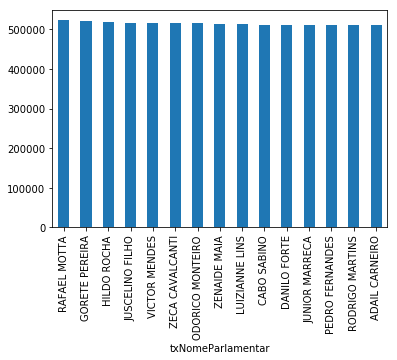

In [8]:
ceap_deputado_2018[:15].plot.bar()

---

Deputados que *menos* gastaram no ano de 2018

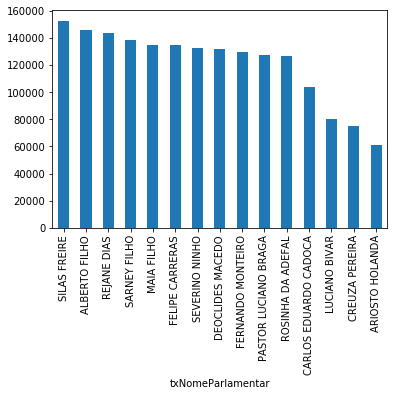

In [9]:
ceap_deputado_2018[-15:].plot.bar()

In [10]:
ceap_deputado_2019 = df_deputados_nordeste_2019.groupby(df_deputados_nordeste_2019['txNomeParlamentar']).sum()['vlrLiquido'].sort_values(ascending=False)

Deputados que *mais* gastaram, mais usaram a CEPA em 2019.

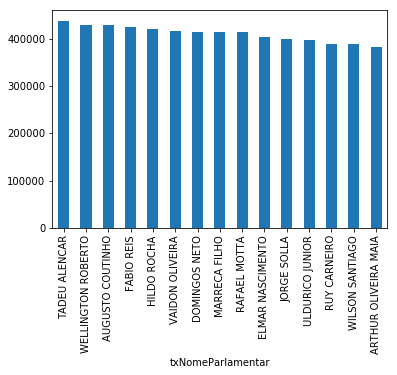

In [11]:
ceap_deputado_2019[:15].plot.bar()

---

Deputados que *menos* gastaram em 2019.

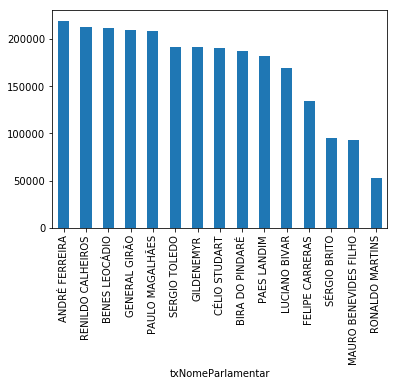

In [16]:
ceap_deputado_2019[-15:].plot.bar()

### Analise dos gastos dos deputados nordestidos dentre periodos mensais

- Aqui agrupamos a coluna de valor total da nota fiscal emitida pelo deputado (*vlrLiquido*) pelo número do mês dessa nota. Assim conseguimos visualizar como os gastos totais por mês se comportam no decorrer do ano.

In [12]:
gastos_mensais_2018 = df_deputados_nordeste_2018.groupby(['numMes']).sum()['vlrLiquido']
gastos_mensais_2018

numMes
1     3479551.44
2     3957439.69
3     4520297.56
4     4129454.70
5     4588862.05
6     3018027.43
7     3093551.73
8     2592181.24
9     1942126.70
10    4272741.83
11    4863767.53
12    4707443.20
Name: vlrLiquido, dtype: float64

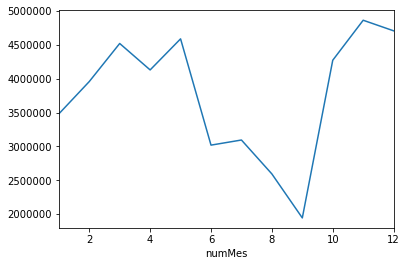

In [13]:
gastos_mensais_2018.plot()

- A partir disso, é possivel verificar que, dentre os meses 6 e 9, os gastos diminuiram drasticamente. Isso aconteceu, possivelmente, pela ocorrência do periodo eleitoral, onde certas atividades são suspensas e/ou possuem limites de gastos que poderão ser custeados pela CEAP.

### Analise de gastos por partido no ano de 2018

- É interessante analisarmos os gastos com a CEAP por partido, tendo em vista que alguns partidos tem muito mais visibilidade e integrantes importantes dentro da camara que outros (o que pode ser visto na Series gerada), mostrando uma grande disparidade de gastos entre os mesmos.  
- Como esses gastos englobam todos os custeios dos deputados, inclusive viagens e etc., vemos como certos partidos tem mais voz e presença.

In [14]:
gasto_partido_2018 = df_deputados_nordeste_2019.groupby('sgPartido').sum()['vlrLiquido'].sort_values(ascending=False)
gasto_partido_2018

sgPartido
PP               3582474.31
PT               2988978.92
PSB              2570629.78
DEM              2157148.06
PL               1919980.10
PSDB             1844043.64
PDT              1791277.00
REPUBLICANOS     1656918.43
PTB              1581915.63
MDB              1556458.47
PSD              1364296.84
SOLIDARIEDADE    1364166.74
PSL              1129684.15
PCdoB             968569.82
PODE              768014.50
PROS              767495.19
PATRIOTA          666845.94
PSC               552272.63
CIDADANIA         355590.58
AVANTE            285751.57
PMN               227586.79
PRB                60807.06
PPL                44925.75
PR                 37303.00
PATRI              28839.72
PPS                23940.56
Name: vlrLiquido, dtype: float64

- Separando os gastos por partido podemos ver que existe uma grande diferença entre os mesmos. Mais a frente iremos comparar e relacionar o gastos do partido com sua quantidade de integrantes e as suas atividades.

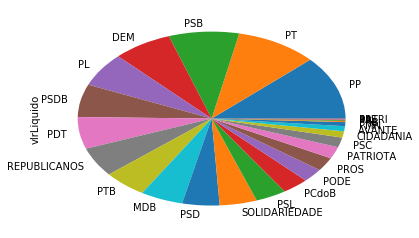

In [15]:
gasto_partido_2018.plot.pie()

- Graficamente é facilmente perceptivel que poucos partidos detem grande parte dos gastos com a CEAP. Vemos que somente 3 partidos gastam mais de 25% do total e que somente 6 partidos gastam a metede do total de 26.

In [16]:
## deputados por api (nao usar pra nao dar conflito)
nomes_deputados_nordeste_2018 = [dep['siglaPartido'] for dep in deputados_Nordeste_2018['dados']]
qnt_deputados_partido_2018 = pd.Series(nomes_deputados_nordeste_2018).value_counts()
qnt_deputados_partido_2018

PP               19
PT               19
PSB              15
PSDB             14
PDT              14
DEM              13
MDB              13
PR               12
PSD              12
PTB               8
PODE              7
PRB               7
PCdoB             6
AVANTE            5
PROS              5
PSC               4
SOLIDARIEDADE     4
PPS               3
PATRI             3
PHS               2
PRTB              1
PSL               1
PV                1
PPL               1
dtype: int64

In [17]:
## deputados pelo data frame (USAR ESSE)
df_deputados_nordeste_2019.groupby('txNomeParlamentar').first()

,cpf,ideCadastro,nuCarteiraParlamentar,nuLegislatura,sgUF,sgPartido,codLegislatura,numSubCota,txtDescricao,numEspecificacaoSubCota,...,numAno,numParcela,txtPassageiro,txtTrecho,numLote,numRessarcimento,vlrRestituicao,nuDeputadoId,ideDocumento,urlDocumento
txNomeParlamentar,,,,,,,,,,,,,,,,,,,,,
ADOLFO VIANA,8.012385e+10,204560.0,191.0,2019,BA,PSDB,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,2019,0,ADOLFO VIANA,BSB/SSA,1619329,0.0,NaN,3326,6886995,https://www.camara.leg.br/cota-parlamentar/doc...
AFONSO FLORENCE,1.773415e+10,160508.0,182.0,2015,BA,PT,55,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,2019,0,AFONSO FLORENCE,BSB/SSA,1558082,0.0,NaN,2406,6746805,https://www.camara.leg.br/cota-parlamentar/doc...
AGUINALDO RIBEIRO,5.192115e+10,160527.0,129.0,2015,PB,PP,55,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,2019,0,AGUINALDO RIBEIRO,BSB/JPA,1557070,0.0,NaN,2408,6744192,http://camara.leg.br/cota-parlamentar/nota-fis...
AJ ALBUQUERQUE,9.750606e+10,204549.0,87.0,2019,CE,PP,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,2019,0,AJ ALBUQUERQUE,BSB/FOR,1568217,0.0,NaN,3216,6764378,http://camara.leg.br/cota-parlamentar/nota-fis...
ALEX SANTANA,6.468242e+10,204571.0,194.0,2019,BA,PDT,56,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,2019,0,ALEX SANTANA,SSA/BSB,1568075,0.0,NaN,3287,6764135,http://camara.leg.br/cota-parlamentar/nota-fis...
ALICE PORTUGAL,1.237739e+10,74057.0,180.0,2015,BA,PCdoB,55,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,2019,0,ALICE PORTUGAL,BSB/SSA,1572168,0.0,NaN,1531,6775064,https://www.camara.leg.br/cota-parlamentar/doc...
ALUISIO MENDES,6.674649e+10,178881.0,68.0,2015,MA,PODE,55,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,2019,0,CELSO ADRIANO COSTA DIAS;,SLZ/THE,1559332,0.0,130.00,2999,6746901,http://camara.leg.br/cota-parlamentar/nota-fis...
ANTONIO BRITO,5.148887e+10,160553.0,189.0,2015,BA,PSD,55,1,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,0,...,2019,0,ANTONIO BRITO,BSB/SSA,1555570,0.0,NaN,2407,6741941,https://www.camara.leg.br/cota-parlamentar/doc...
ARTHUR LIRA,6.782109e+10,160541.0,162.0,2015,AL,PP,55,3,COMBUSTÍVEIS E LUBRIFICANTES.,1,...,2019,0,CAVALCANTE/LUCIANO,MCZ/BSB,1565541,0.0,NaN,2377,6757138,http://camara.leg.br/cota-parlamentar/nota-fis...


In [18]:
df_deputados_nordeste_2019.columns

Index([u'txNomeParlamentar', u'cpf', u'ideCadastro', u'nuCarteiraParlamentar',
       u'nuLegislatura', u'sgUF', u'sgPartido', u'codLegislatura',
       u'numSubCota', u'txtDescricao', u'numEspecificacaoSubCota',
       u'txtDescricaoEspecificacao', u'txtFornecedor', u'txtCNPJCPF',
       u'txtNumero', u'indTipoDocumento', u'datEmissao', u'vlrDocumento',
       u'vlrGlosa', u'vlrLiquido', u'numMes', u'numAno', u'numParcela',
       u'txtPassageiro', u'txtTrecho', u'numLote', u'numRessarcimento',
       u'vlrRestituicao', u'nuDeputadoId', u'ideDocumento', u'urlDocumento'],
      dtype='object')